# Experiments on EMG analysis
This notebook allows a researcher to collect data on a set of EMG. The data are collected for each breath and include total area under breath curve, maximum value in each breath, legnth of breaths, and relative location of maximum value(as both raw and percentage of total breath).

## Import libraries

In [1]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.signal import find_peaks
import collections
from collections import namedtuple
import builtins
import math

from resurfemg.config import Config
from resurfemg.tmsisdk_lite import Poly5Reader
import resurfemg.helper_functions as hf
import resurfemg.converter_functions as cf

%matplotlib widget

In [2]:
config = Config()
root_emg_directory = config.get_directory('root_emg_directory')
#C:/Projects/ReSurfEMG/not_pushed/your_data_anonymized

In [3]:
testdata = 'M:/Documents/CRPH/Cooperations/UMCG_USIsala/UNDATED_sEMGpt4en5/COPD_00004/20230421T132716 - ontslag/20230421_132716.Data8Raw.Poly5'

In [4]:
data_emg = Poly5Reader(testdata)
#data_emg = Poly5Reader(our_sample)
data_samples = data_emg.samples
emg_sample_rate = data_emg.sample_rate
converted_to_seconds =  []
converted_to_samples = []
for i in range(len(data_samples[0])):
    converted_to_seconds.append(i/emg_sample_rate)
    converted_to_samples.append(i)
data_samples = data_emg.samples
emg_sample_rate = data_emg.sample_rate
converted_to_seconds =  []
converted_to_samples = []
for i in range(len(data_samples[0])):
    converted_to_seconds.append(i/emg_sample_rate)
    converted_to_samples.append(i)

Reading file  M:/Documents/CRPH/Cooperations/UMCG_USIsala/UNDATED_sEMGpt4en5/COPD_00004/20230421T132716 - ontslag/20230421_132716.Data8Raw.Poly5
	 Number of samples:  445185 
	 Number of channels:  21 
	 Sample rate: 500 Hz
Done reading data.


In [5]:
np.shape(data_emg.samples)

(21, 445185)

Text(0.5, 0.98, '21 kanalen 8RAW?')

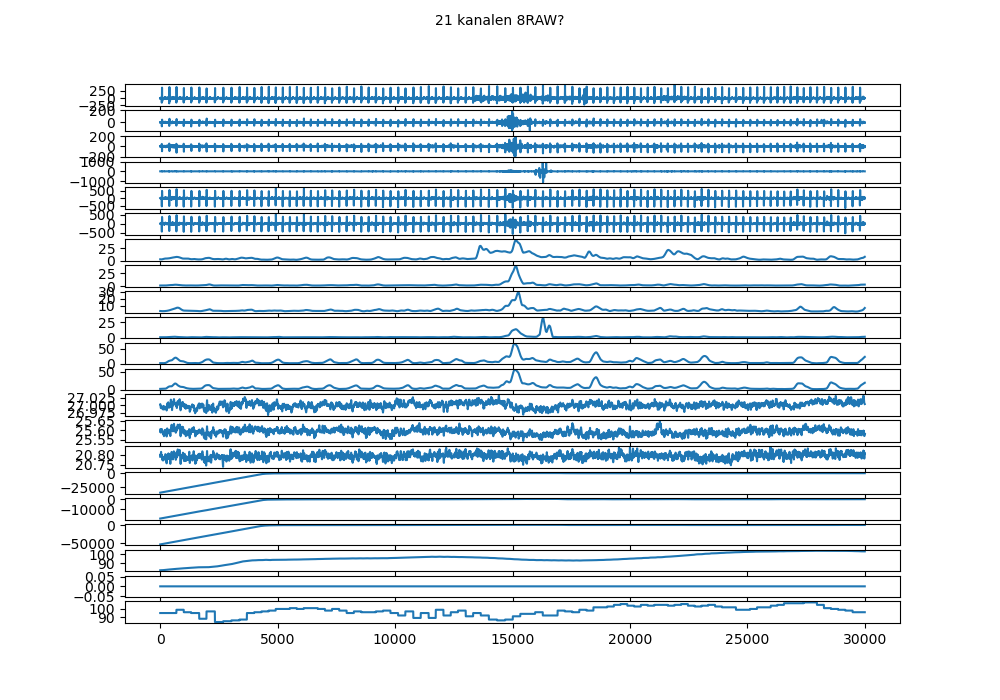

In [6]:
fig, axs = plt.subplots(21, 1, figsize=(10,7))
axs[0].plot(data_emg.samples[0][1:30000])
axs[1].plot(data_emg.samples[1][1:30000])
axs[2].plot(data_emg.samples[2][1:30000])
axs[3].plot(data_emg.samples[3][1:30000])
axs[4].plot(data_emg.samples[4][1:30000])
axs[5].plot(data_emg.samples[5][1:30000])
axs[6].plot(data_emg.samples[6][1:30000])
axs[7].plot(data_emg.samples[7][1:30000])
axs[8].plot(data_emg.samples[8][1:30000])
axs[9].plot(data_emg.samples[9][1:30000])
axs[10].plot(data_emg.samples[10][1:30000])
axs[11].plot(data_emg.samples[11][1:30000])
axs[12].plot(data_emg.samples[12][1:30000])
axs[13].plot(data_emg.samples[13][1:30000])
axs[14].plot(data_emg.samples[14][1:30000])
axs[15].plot(data_emg.samples[15][1:30000])
axs[16].plot(data_emg.samples[16][1:30000])
axs[17].plot(data_emg.samples[17][1:30000])
axs[18].plot(data_emg.samples[18][1:30000])
axs[19].plot(data_emg.samples[19][1:30000])
axs[20].plot(data_emg.samples[20][1:30000])
fig.suptitle('21 kanalen 8RAW?',fontsize=10)


* Intercostal 1-2           > inter - 1
* Dia R 3-4                 > Fdia - 2
* Dia L 5-6                 > Ddia - 3
* Abd 7-8                   > Abd - 4
* Bilateral dia 3-5 rib 8   > 5   
* Bilateral dia 4-6 rib 10  > 6

Text(0.5, 1.0, 'Abdominal')

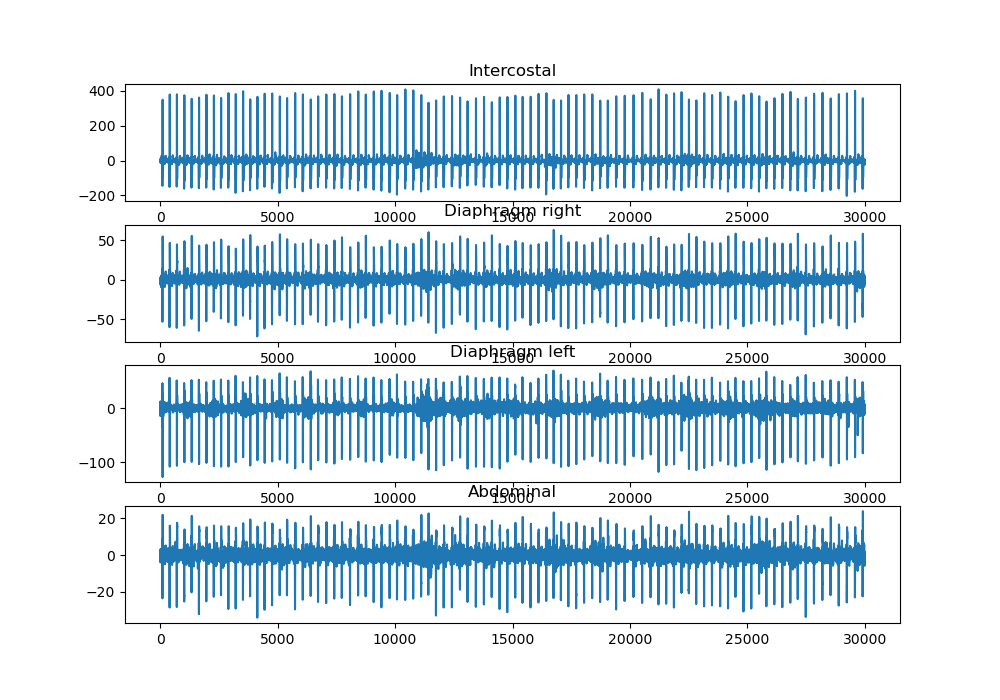

In [7]:
#plt.close(plt.gcf())
fig1, axs1 = plt.subplots(4, 1, figsize=(10,7))
axs1[0].plot(data_emg.samples[0][30000:60000])
axs1[0].set_title('Intercostal')
axs1[1].plot(data_emg.samples[1][30000:60000])
axs1[1].set_title('Diaphragm right')
axs1[2].plot(data_emg.samples[2][30000:60000])
axs1[2].set_title('Diaphragm left')
axs1[3].plot(data_emg.samples[3][30000:60000])
axs1[3].set_title('Abdominal')


In [8]:
numpy_array = cf.poly_dvrman(testdata)

In [9]:
data_samples = Poly5Reader(testdata)
samps = np.vstack([data_samples.samples[:6]])

In [10]:
np.shape(samps)

In [11]:
#plt.close(plt.gcf())
plt.figure()
plt.subplot(411)
plt.plot(numpy_array[0][1:30000])
plt.subplot(412)
plt.plot(numpy_array[1][1:30000])
plt.subplot(413)
plt.plot(numpy_array[2][1:30000])
plt.subplot(414)
plt.plot(numpy_array[3][1:30000])

#fig, axs = plt.subplots(4)
#axs[0].plot(numpy_array[0][1:30000])
#axs[1].plot(numpy_array[1][1:30000])
#axs[2].plot(numpy_array[2][1:30000])
#axs[3].plot(numpy_array[3][1:30000])

In [12]:
plt.close(plt.gcf())

In [13]:
plt.figure()
plt.subplot(411)
plt.plot(samps[0][1:30000])
plt.subplot (412)
plt.plot(samps[1][1:30000])
plt.subplot(413)
plt.plot(samps[2][1:30000])
plt.subplot(414)
plt.plot(samps[3][1:30000])

In [14]:
dia_r=numpy_array[1]
low_freq=20
high_freq=200
sample_rate=500
emg_data_filtered = hf.emg_bandpass_butter_sample(dia_r,low_freq, high_freq, sample_rate)
plt.figure()
plt.plot(emg_data_filtered)

In [15]:
plt.close(plt.gcf())
plt.figure()
plt.plot(emg_data_filtered[0:15000])

In [ ]:
plt.close(plt.gcf())
emg_filt=hf.notch_filter(emg_data_filtered, 500, 50, 1)
plt.figure()
plt.plot(emg_filt[0:10000])

In [ ]:
plt.close(plt.gcf())
emg_filt2=hf.notch_filter(emg_filt, 500, 20, 1)
plt.figure()
plt.plot(emg_filt2[0:10000])

In [ ]:
ecg_rms = hf.full_rolling_rms(emg_filt2, 10)
ecg_rms2=ecg_rms[0:10000]
peak_width = 0.01
peak_fraction = 0.40
peak_height = peak_fraction * (max(ecg_rms2) - min(ecg_rms2))
ecg_peaks, _ = find_peaks(ecg_rms, height=peak_height,width=peak_width * sample_rate, distance=int(sample_rate / 3))

plt.figure()
plt.plot(ecg_rms)
plt.plot(ecg_peaks,ecg_rms2[ecg_peaks], 'r*')

In [ ]:
#emg_ecg = []
#titles = []
gating_method=3
# 0: Zeros, 1: Interpolate start-end, 2: Average prior data, 3: Moving average

gate_width = sample_rate//10
#ecg_rms = hf.full_rolling_rms(emg_filt, 10)
#peak_height = peak_fraction * (max(ecg_rms) - min(ecg_rms))
#ecg_peaks, _ = find_peaks(ecg_rms, height=peak_height,width=peak_width * sample_rate, distance=int(sample_rate / 3))

emg_clean = hf.gating(emg_filt2, ecg_peaks, gate_width, method=gating_method)
emg_clean = np.array(emg_clean)



In [ ]:
#plt.close(plt.gcf())
fig, axs = plt.subplots(1)
axs.plot(emg_clean[0:10000])

#plt.plot(emg_clean)

In [ ]:
np.shape(emg_clean)

In [ ]:
2+2

In [ ]:
plt.close(plt.gcf())
fig, axs = plt.subplots(1)
axs.plot(emg_clean[0:10000])

In [ ]:
emg_rms = hf.full_rolling_rms(emg_clean, 20)
emg_rms2= hf.full_rolling_rms(emg_clean,125)
emg_rms3= hf.full_rolling_rms(emg_clean,300)
fig, axs = plt.subplots(4)

axs[0].plot(emg_rms[0:10000])
axs[1].plot(emg_rms2[0:10000])
axs[2].plot(emg_rms3[0:10000])
axs[3].plot(dia_r[0:10000])

In [ ]:
ecg_rms = hf.full_rolling_rms(emg_filt, 10)
ecg_rms2=ecg_rms[20000:30000]
peak_width = 0.01
peak_fraction = 0.40
peak_height = peak_fraction * (max(ecg_rms2) - min(ecg_rms2))
ecg_peaks, _ = find_peaks(ecg_rms2, height=peak_height,width=peak_width * sample_rate, distance=int(sample_rate / 3))
fig, axs = plt.subplots(1)
axs.plot(ecg_rms2)
axs.plot(ecg_peaks,ecg_rms2[ecg_peaks], 'r*')

In [ ]:
emg_rms = hf.full_rolling_rms(emg_clean, 200)

fig, axs = plt.subplots(2)

axs[0].plot(emg_rms[50000:70000])
axs[1].plot(dia_r[50000:70000])


In [ ]:
np.size(emg_data_filtered)

In [ ]:
2+2

In [ ]:
fig, axs = plt.subplots(4)
axs[0].plot(numpy_array[2][30000:60000])
axs[0].set_title('Raw')
axs[1].plot(emg_data_filtered[30000:60000])
axs[1].set_title('bandpass 3 50')
axs[2].plot(emg_clean[30000:60000])
axs[2].set_title('gated')
axs[3].plot(emg_env[30000:60000])
axs[3].set_title('env')


In [ ]:
emg_env = hf.full_rolling_rms(abs(emg_data_filtered), 20)


In [ ]:
dia_r=numpy_array[1]
cut_off=200
dia_r_hp=hf.emg_highpass_butter(dia_r, cut_off, emg_sample_rate)
plt.plot(dia_r_hp[0:10000])

In [ ]:
new_file_name = 'M:/Documents/CRPH/Cooperations/UMCG_USIsala/UNDATED_sEMGpt4en5/COPD_00004/20230419T113930_opname/test.npy'



In [ ]:
test =samps

In [ ]:
np.save(new_file_name, test)

## andere dataset - DATA14ChDIPHA - ruwe data losse electrodes

In [ ]:
testdata2 = 'M:/Documents/CRPH/Cooperations/UMCG_USIsala/UNDATED_sEMGpt4en5/COPD_00004/20230419T113930_opname/20230419_113930.Data14ChDIPHA.Poly5'

In [ ]:
data_emg = Poly5Reader(testdata2)

In [ ]:
fig, axs = plt.subplots(14, 1, figsize=(10,7))
axs[0].plot(data_emg.samples[0][1:30000])
axs[1].plot(data_emg.samples[1][1:30000])
axs[2].plot(data_emg.samples[2][1:30000])
axs[3].plot(data_emg.samples[3][1:30000])
axs[4].plot(data_emg.samples[4][1:30000])
axs[5].plot(data_emg.samples[5][1:30000])
axs[6].plot(data_emg.samples[6][1:30000])
axs[7].plot(data_emg.samples[7][1:30000])
axs[8].plot(data_emg.samples[8][1:30000])
axs[9].plot(data_emg.samples[9][1:30000])
axs[10].plot(data_emg.samples[10][1:30000])
axs[11].plot(data_emg.samples[11][1:30000])
axs[12].plot(data_emg.samples[12][1:30000])
axs[13].plot(data_emg.samples[13][1:30000])
fig.suptitle('ruwe data losse electrodes',fontsize=10)


In [ ]:
numpy_array = cf.poly_dvrman(testdata)

# plotten

In [ ]:
fig, axs = plt.subplots(21)
axs[0].plot(numpy_array[0][1:30000])
axs[1].plot(numpy_array[1][1:30000])
axs[2].plot(numpy_array[2][1:30000])
axs[3].plot(numpy_array[3][1:30000])
axs[4].plot(numpy_array[4][1:30000])
axs[5].plot(numpy_array[5][1:30000])
axs[6].plot(numpy_array[6][1:30000])
axs[7].plot(numpy_array[7][1:30000])
axs[8].plot(numpy_array[8][1:30000])
axs[9].plot(numpy_array[9][1:30000])
axs[10].plot(numpy_array[10][1:30000])
axs[11].plot(numpy_array[11][1:30000])
axs[12].plot(numpy_array[12][1:30000])
axs[13].plot(numpy_array[13][1:30000])
axs[14].plot(numpy_array[14][1:30000])
#axs[15].plot(numpy_array[15][1:30000])
axs[16].plot(numpy_array[16][1:30000])
axs[17].plot(numpy_array[17][1:30000])
axs[18].plot(numpy_array[18][1:30000])
axs[19].plot(numpy_array[19][1:30000])
axs[20].plot(numpy_array[20][1:30000])
axs[21].plot(numpy_array[21][1:30000])

In [ ]:
numpy_array.shape


In [ ]:
emg_pattern = os.path.join(root_emg_directory, '**/*.Poly5')
emg_and_draeger_files = glob.glob(emg_pattern, recursive=True)

emg_files = []
draeger_files = []

for file in emg_and_draeger_files:
    if 'Draeger' in file:
        draeger_files.append(file)
    else:
        emg_files.append(file)

Now you can pick a file from the list, which have been numbered.

In [ ]:
list_of_numbers_strung = []
for i in range(len(emg_files)):
    list_of_numbers_strung.append(str(i))


btn = widgets.Dropdown(
    options=list_of_numbers_strung,
    value='0',
    description='Picked File:',
    disabled=False,
)
display(btn)

# Caution! 
If you folder is set up in any way different then the picked file numbers will not neccesarily correspond to the same file. Always check the print out for the file you have chosen in the cell below

In [ ]:
number_chosen = int(btn.value)
file_chosen = emg_files[number_chosen] 
print("The file you chose is:",file_chosen)

In [ ]:
data_emg = Poly5Reader(file_chosen)
data_samples= data_emg.samples
emg_sample_rate = data_emg.sample_rate
converted_to_seconds =  []
converted_to_samples = []
for i in range(len(data_samples[0])):
    converted_to_seconds.append(i/emg_sample_rate)
    converted_to_samples.append(i)

In [ ]:
%matplotlib inline
# set up plotn
x = data_samples
fig, axis = plt.subplots(nrows = 3, ncols = 2, figsize=(6, 6))
axis[0,0].grid(True)
axis[0,0].plot(x[0])
axis[0,0].set(title='leads in samples')
axis[1,0].plot(x[1])
axis[2,0].plot(x[2])
axis[0,1].set(title='leads in seconds')
axis[0,1].grid(True)
axis[0,1].plot(converted_to_seconds,x[0])
axis[1,1].plot(converted_to_seconds,x[1])
axis[2,1].plot(converted_to_seconds,x[2])

That is the whole unfiltered EMG, but you probably want to examine a part. You will also want to examine something filtered down to only the EMG components. Therefore we will filter off only the EMG components with an ICA in addtion to the filter we will play with.

Now you can filter down to which part you want to see. 

Do you want to cut and see the file in samples or seconds?

In [ ]:
y_axis = widgets.Dropdown(
    options=["Samples","Seconds"],
    value='Samples',
    description="Select View Option",
    disabled=False,
)
display(y_axis)


In [ ]:
time_view= y_axis.value
time_view

Now you will pick the start and end of your sample.We are going to clip the end of the sample in processing, so you can not pick any values and get a good graph. We preset the values towards the max graphable with ease, but they can be overwritten.  In the future we will have an updating graph here. 

In [ ]:
if time_view == 'Samples':
    int_slider1 = widgets.IntSlider(
        min=0, max=int(len(x[0])*0.89), step=1,
        description=' samples start'
    )
    int_slider2 = widgets.IntSlider(
        value=len(x[0]),
        min=0, max=int(len(x[0])*0.89), step=1,
        description='samples end cutoff'
    )
else:
    int_slider1 = widgets.IntSlider(
        #value=0.1,
        min=0, max= int(converted_to_seconds[-1])*0.89, step=1,
        description='seconds start'
    )
    int_slider2 = widgets.IntSlider(
        #value=converted_to_seconds[-1],
        min=0, max=int(converted_to_seconds[-1])*0.89, step= 1,
        description='seconds end cutoff'
    )
    
widgets.VBox(
    [

        int_slider1,
        int_slider2,

    ]
)



You can overwrite the values by hand in the next cell, if scrolling is not precise enough...but rewriting to take an absolute end is unadvisable.

In [ ]:
# # # # Here we can overwrite the values by hand, again you must pick values a bit inside
# int_slider1.value = 1
# int_slider2.value = 17

For now we will graph your choice in the next active cell

In [ ]:
start = int_slider1.value
end= int_slider2.value
if time_view == 'Samples':
    # nox examine at a certain scale- from point a to b as samples
    x = data_samples
    fig, (ax_1,ax_2,ax_3) = plt.subplots(nrows = 3, figsize=(6, 4))
    ax_1.grid(True)
    ax_1.plot(x[0][int(start):int(end)])
    ax_1.set(title='leads, samples')
    ax_2.plot(x[1][int(start):int(end)])
    ax_3.plot(x[2][int(start):int(end)])
    
if time_view == 'Seconds':
    # nox examine at a certain scale- from point a to b as samples
    x_for_secs = data_samples

    y = converted_to_seconds
    fig, (ax_1,ax_2,ax_3) = plt.subplots(nrows = 3, figsize=(6, 4))
    ax_1.grid(True)
    ax_1.plot(y[int(start*emg_sample_rate):int(end*emg_sample_rate)],x[0][int(start*emg_sample_rate):int(end*emg_sample_rate)])
    ax_1.set(title='leads, seconds')
    ax_2.plot(y[int(start*emg_sample_rate):int(end*emg_sample_rate)],x[1][int(start*emg_sample_rate):int(end*emg_sample_rate)])
    ax_3.plot(y[int(start*emg_sample_rate):int(end*emg_sample_rate)],x[2][int(start*emg_sample_rate):int(end*emg_sample_rate)])
    

## cut bad end

In [ ]:
cut_percent=3
cut_tolerance=5
emg_cut = hf.bad_end_cutter_for_samples(data_samples, cut_percent, cut_tolerance)
plt.plot(emg_cut[2])

## High pass 200Hz and plot

In [ ]:
cut_off=200
data_hp=hf.emg_highpass_butter(emg_cut, cut_off, emg_sample_rate)
plt.plot(data_hp[2])

In [ ]:
plt.plot(data_hp[2][200:8000])


In [ ]:
emg_env = hf.full_rolling_rms(abs(data_hp[2]), 200)
plt.plot(emg_env[0:2000])